In [1]:
install.packages('forecast')
install.packages('TSA')
library(forecast)
library(TSA)


  There is a binary version available but the source version is later:
         binary source needs_compilation
forecast   8.21 8.23.0              TRUE

  Binaries will be installed
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\5-05\AppData\Local\Temp\Rtmpe8s5rX\downloaded_packages
package 'TSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\5-05\AppData\Local\Temp\Rtmpe8s5rX\downloaded_packages


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


다음의 패키지를 부착합니다: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




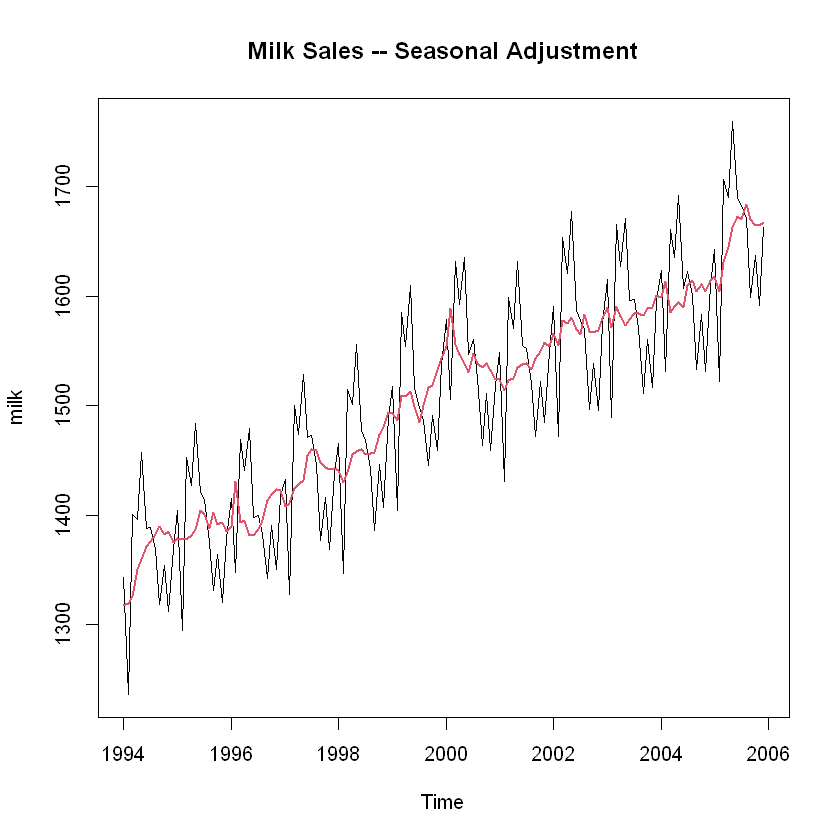

In [2]:
data(milk)
plot(milk, main="Milk Sales -- Seasonal Adjustment")
lines(seasadj(decompose(milk)), col=2, lwd=2)


# decompose 로 최대한 계절성을 없앰

In [3]:
mm3 <- filter(milk, f=rep(1/3, 3))
mm6 <- filter(milk, f=rep(1/6, 6))
mm12 <- filter(milk, f=rep(1/12, 12))

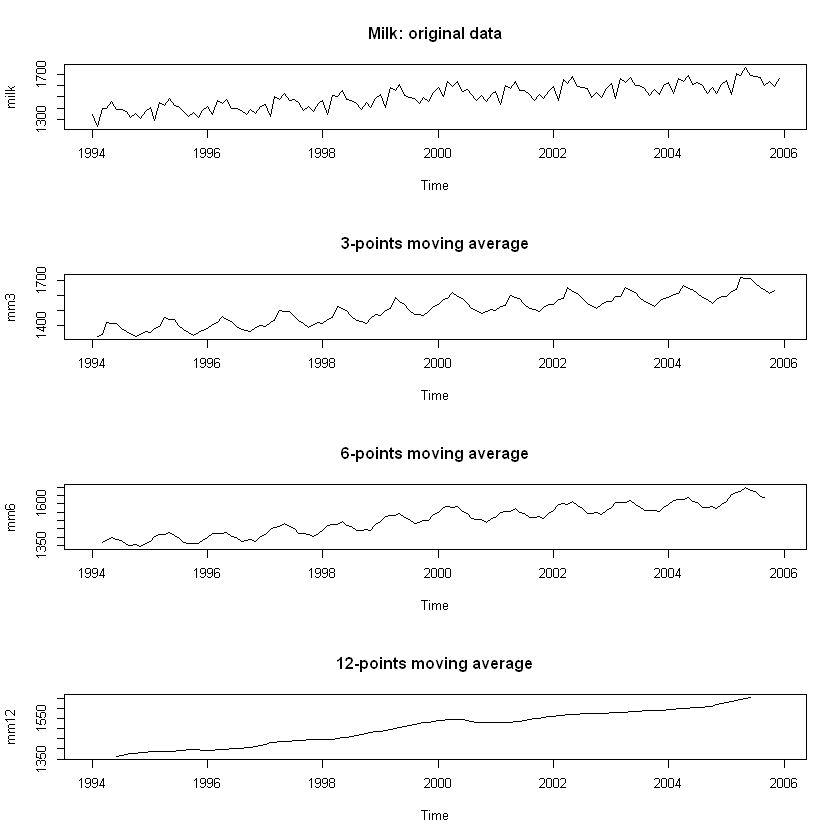

In [4]:
par(mfcol=c(4,1))
plot(milk, main="Milk: original data")
plot(mm3, main="3-points moving average")
plot(mm6, main="6-points moving average")
plot(mm12, main="12-points moving average")


In [5]:
dd1 <- matrix(c(1342, 1442, 1252, 1343,
                1425, 1362, 1256, 1272,
                1243, 1359, 1412, 1253,
                1201, 1478, 1322, 1406,
                1254, 1289, 1497, 1208))


In [6]:
dd1.ts <- ts(data=dd1, start=c(2016,1), frequency=4)
dd1.ts

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1342,1442,1252,1343
2017,1425,1362,1256,1272
2018,1243,1359,1412,1253
2019,1201,1478,1322,1406
2020,1254,1289,1497,1208


### 1. 단순 이동평균 평활법(simple moving average smoothing)

In [7]:
ff <- filter(dd1.ts, filter=rep(1, 4)/4, method="convolution", sides=1)

In [8]:
ff

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,NA,1344.75
2017,1365.50,1345.50,1346.50,1328.75
2018,1283.25,1282.50,1321.50,1316.75
2019,1306.25,1336.00,1313.50,1351.75
2020,1365.00,1317.75,1361.50,1312.00


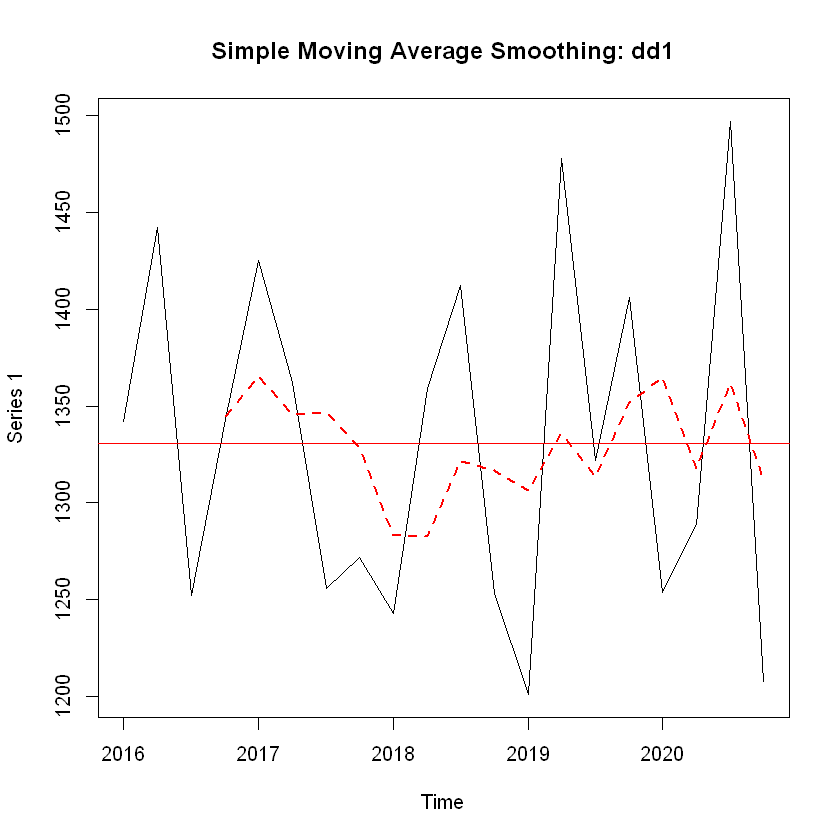

In [9]:
plot(dd1.ts, main="Simple Moving Average Smoothing: dd1")
lines(ff, col="red", lty=2, lwd=2)
abline(h=mean(dd1.ts), col='red')

### Box-Pierce test
* 귀무가설은 독립적이다.
* 대립가설은 자기상관이 있다
* p-value가 0.05보다 크면 독립성 획득, 0.05보다 작으면 자기상관성 유지 

In [10]:
res <- ff[-1:-3, ] - dd1.ts[-1:-3, ]
Box.test(res)


	Box-Pierce test

data:  res
X-squared = 0.68668, df = 1, p-value = 0.4073


### 2. 이중 이동평균 평활법(Double Moving Average Smoothing)

In [11]:
ff1 <- filter(dd1.ts, filter=rep(1, 3)/3, method="convolution", sides=1)
ff2 <- filter(ff1, filter=rep(1, 3)/3, method="convolution", sides=1)
ff2


,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,NA,NA
2017,1343.667,1354.111,1354.778,1340.333
2018,1300.444,1281.667,1295.444,1323.556
2019,1322.667,1313.556,1311.000,1348.778
2020,1354.333,1348.556,1330.111,1331.444


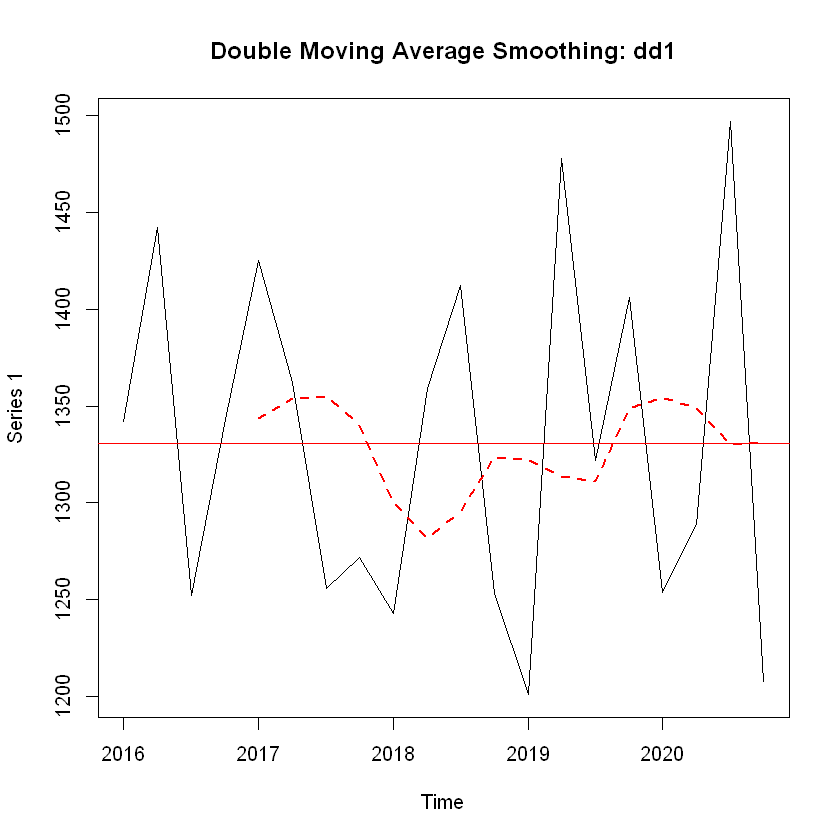

In [12]:
plot(dd1.ts, main="Double Moving Average Smoothing: dd1")
lines(ff2, col='red', lty=2, lwd=2)
abline(h=mean(dd1.ts), col='red')


In [14]:
res <- ff2[-1:-3, ] - dd1.ts[-1:-3, ]
Box.test(res)


	Box-Pierce test

data:  res
X-squared = 0.737, df = 1, p-value = 0.3906


### 3. 가중 이동평균 평활법(Weighted Moving Average Smoothing)
- 최근 트랜드에 가중치를 두고 평활

In [15]:
w1 <- c(0.4, 0.3, 0.2, 0.1)  # 직전시간에 40%, 전전시간 30%
ff3 <- filter(dd1.ts, filter=w1, method="convolution", sides=1)
ff3

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,NA,1335.4
2017,1367.5,1366.1,1330.3,1300.5
2018,1266.2,1296.5,1348.3,1320.9
2019,1274.6,1343.3,1337.7,1374.7
2020,1335.6,1305.2,1376.9,1315.5


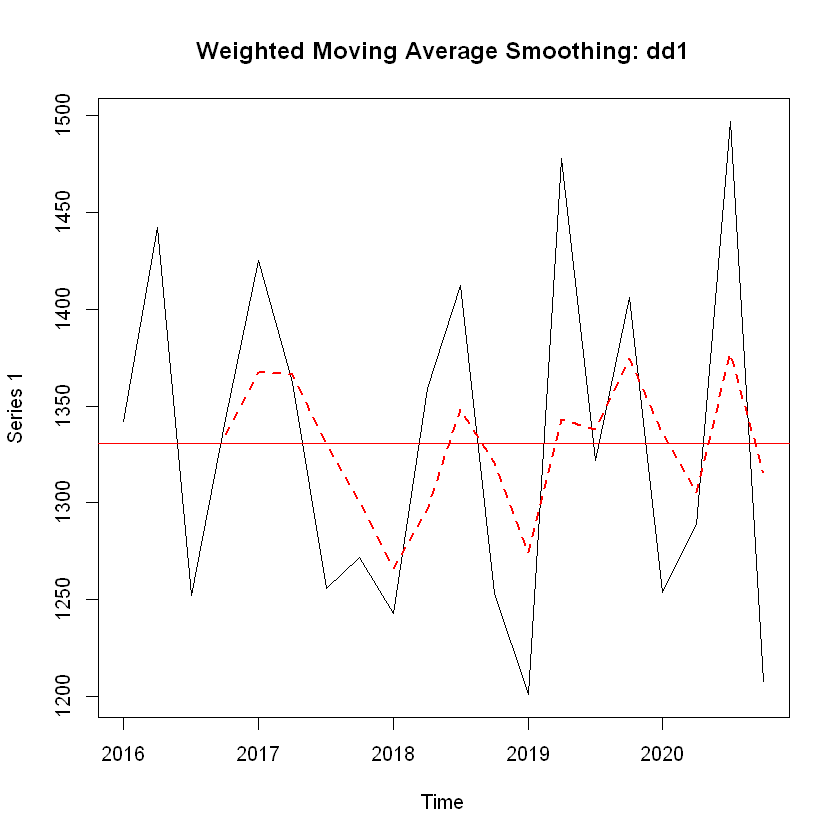

In [16]:
plot(dd1.ts, main = "Weighted Moving Average Smoothing: dd1")
lines(ff3, col='red', lty=2, lwd=2)
abline(h=mean(dd1.ts), col='red')

In [17]:
res <- ff3[-1:-3, ] - dd1.ts[-1:-3, ]
Box.test(res)


	Box-Pierce test

data:  res
X-squared = 1.2749, df = 1, p-value = 0.2588


ff1, ff2, ff3 : p-value 는 점점 줄어들게 됨

### 4. 이동 가중 이동평균 평활법(Double Weight Moving Average Smoothing)

In [18]:
w1 <- c(0.4, 0.3, 0.2, 0.1)  # 직전시간에 40%, 전전시간 30%
ff3 <- filter(dd1.ts, filter=w1, method="convolution", sides=1)
ff4 <- filter(ff3, filter=w1, method="convolution", sides=1)
ff4


,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,NA,NA
2017,NA,NA,1348.99,1329.26
2018,1299.30,1291.59,1311.56,1318.77
2019,1305.42,1318.71,1325.08,1347.31
2020,1348.52,1331.47,1346.91,1333.87


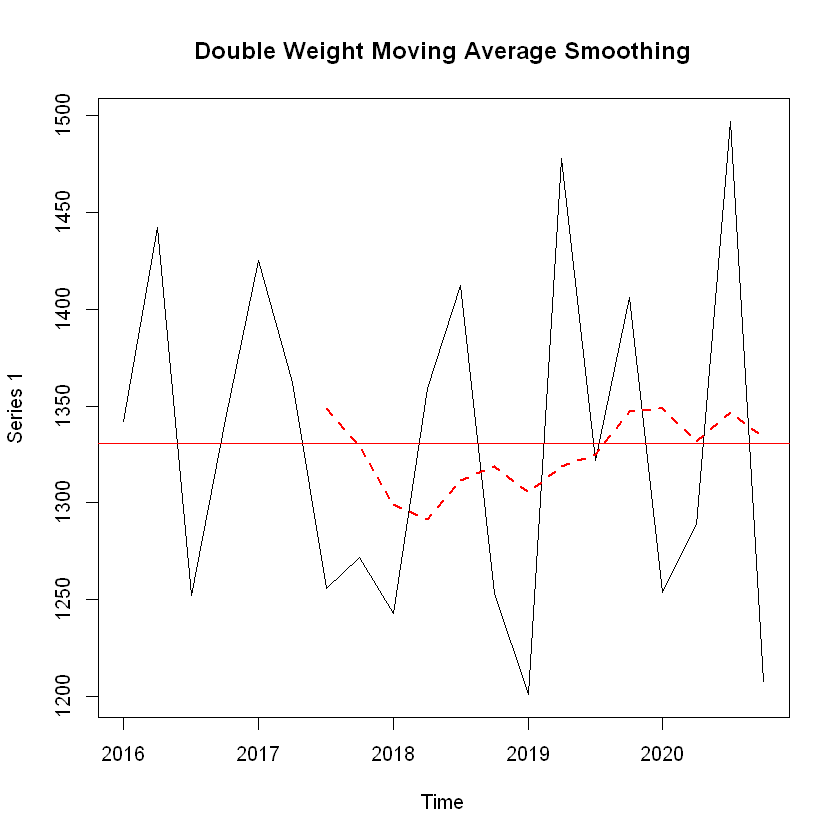

In [19]:
plot(dd1.ts, main = "Double Weight Moving Average Smoothing")
lines(ff4, col='red', lty=2, lwd=2)
abline(h=mean(dd1.ts), col='red')

In [20]:
f1 <- forecast(ff, h=1)  # 1시점 미래 값 예측
f2 <- forecast(ff2, h=1)
f3 <- forecast(ff3, h=1)
f4 <- forecast(ff4, h=1)


# f1 ~ f4 모델이라고 생각하면 됨
# milk 우유값 데이터 
# 각각 필터링된 시계열 데이터를 바탕으로 동일하게 1시점의 미래 값을 예측하는 코드입니다.

Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"
Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"
Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"
Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
"Missing values encountered. Using longest contiguous portion of time series"


In [22]:
f1

# 2021 년 1분기 우유값은 :  1330.823 


        Point Forecast    Lo 80    Hi 80    Lo 95   Hi 95
2021 Q1       1330.823 1295.575 1366.071 1276.916 1384.73

In [23]:
f2



        Point Forecast    Lo 80    Hi 80   Lo 95    Hi 95
2021 Q1       1331.444 1306.824 1356.065 1293.79 1369.098

# 요소분해 
* 계절성, 추세성, 주기변동 등 다양한 변동 성분이 있는데 그것을 분해해서 정상시계열로 만들어주는 것
* 선형적으로 구성되는 가법모형(Additive)
* 비선형적으로 구성되는 승법모형(Multiplicative) 

시계열 자료의 분해 decompose(가법모형)

In [24]:
#기본 시계열 자료
dd <- matrix( c(1342, 1442, 1252, 1343,
                1425, 1362, 1256, 1272,
                  1243, 1359, 1412, 1253,
                1201, 1478, 1322, 1406,
                1254, 1289, 1497, 1208))

dd.ts <- ts(data=dd, start=c(2016, 1), frequency=4)

#계절변동 자료
dd2 <- matrix( c(1142, 1242, 1452, 1543,
                1125, 1262, 1456, 1572,
                  1143, 1259, 1412, 1553,
                1121, 1258, 1472, 1546,
                1154, 1249, 1477, 1548))

#계절추세변동 자료
dd4 <- matrix( c(1142, 1242, 1452, 1543,
                1225, 1362, 1556, 1672,
                  1343, 1459, 1662, 1753,
                1421, 1558, 1772, 1846,
                1554, 1649, 1877, 1948))

In [25]:
dd.ts <- ts(data=dd, start=c(2016, 1), frequency=4)
dd2.ts <- ts(data=dd2, start=c(2016, 1), frequency=4)
dd4.ts <- ts(data=dd4, start=c(2016, 1), frequency=4)


In [26]:
dd.ts

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1342,1442,1252,1343
2017,1425,1362,1256,1272
2018,1243,1359,1412,1253
2019,1201,1478,1322,1406
2020,1254,1289,1497,1208


In [27]:
dd2.ts

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1142,1242,1452,1543
2017,1125,1262,1456,1572
2018,1143,1259,1412,1553
2019,1121,1258,1472,1546
2020,1154,1249,1477,1548


In [28]:
dd4.ts

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1142,1242,1452,1543
2017,1225,1362,1556,1672
2018,1343,1459,1662,1753
2019,1421,1558,1772,1846
2020,1554,1649,1877,1948


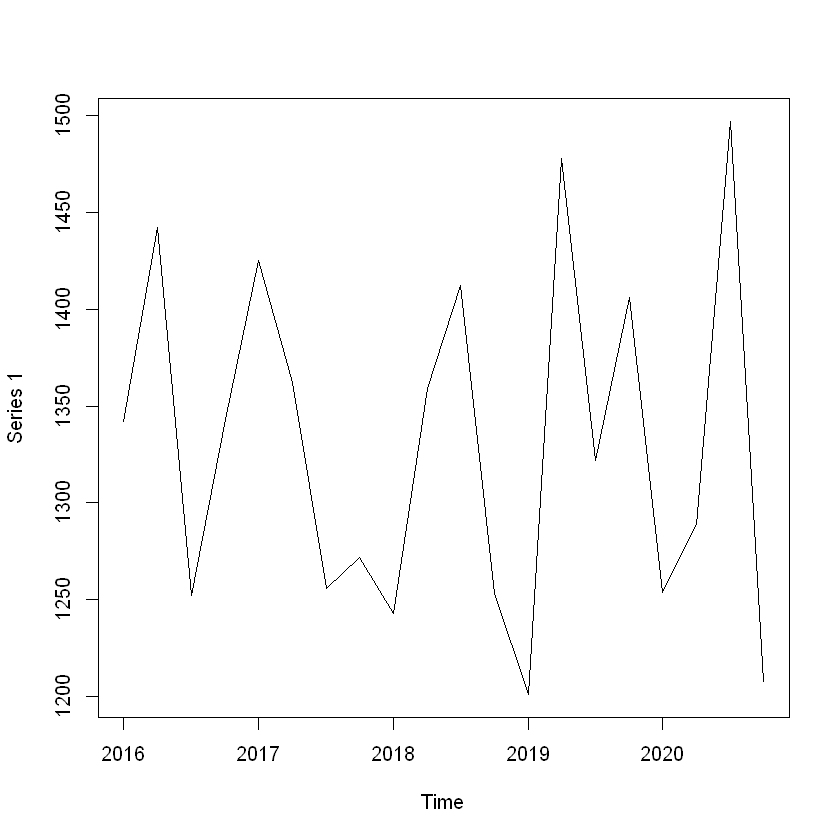

In [29]:
plot(dd.ts)

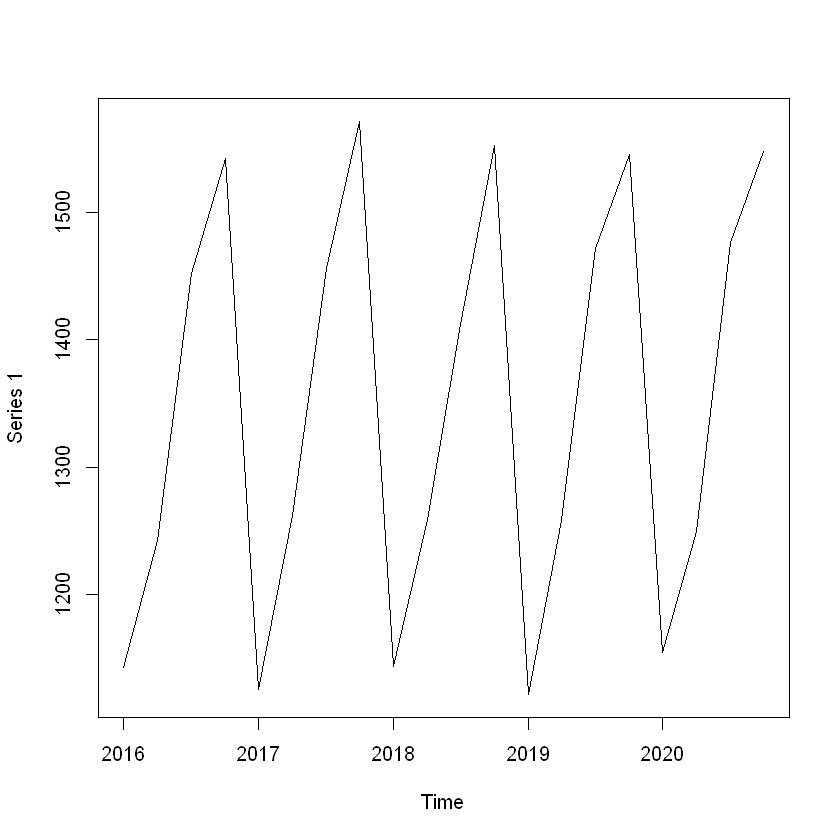

In [30]:
plot(dd2.ts)

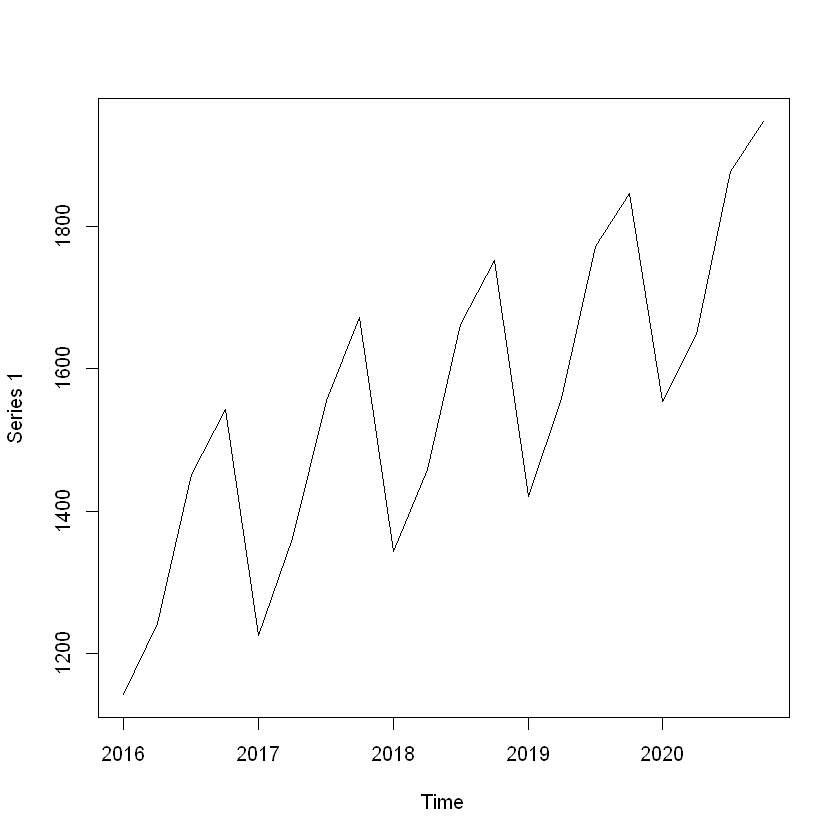

In [31]:
plot(dd4.ts)

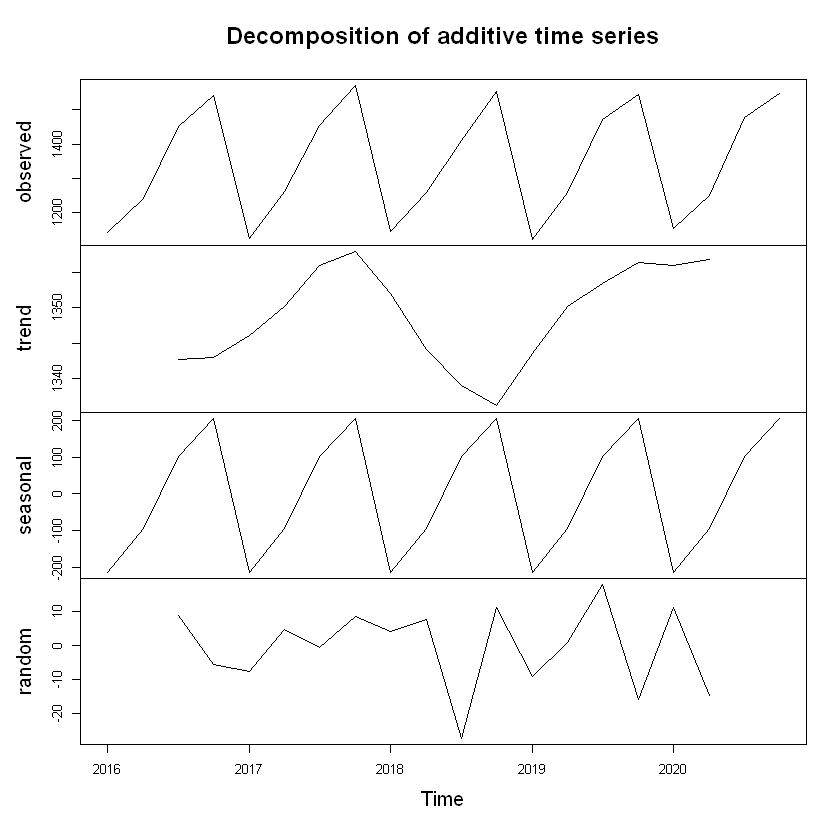

In [32]:
plot(decompose(dd2.ts, type='additive'))  # 차분

In [33]:
 dd4_a <- decompose(dd4.ts, type='a')
 dd4_a 

$x
     Qtr1 Qtr2 Qtr3 Qtr4
2016 1142 1242 1452 1543
2017 1225 1362 1556 1672
2018 1343 1459 1662 1753
2019 1421 1558 1772 1846
2020 1554 1649 1877 1948

$seasonal
           Qtr1       Qtr2       Qtr3       Qtr4
2016 -178.85156  -83.53906   97.49219  164.89844
2017 -178.85156  -83.53906   97.49219  164.89844
2018 -178.85156  -83.53906   97.49219  164.89844
2019 -178.85156  -83.53906   97.49219  164.89844
2020 -178.85156  -83.53906   97.49219  164.89844

$trend
         Qtr1     Qtr2     Qtr3     Qtr4
2016       NA       NA 1355.125 1380.500
2017 1408.500 1437.625 1468.500 1495.375
2018 1520.750 1544.125 1564.000 1586.125
2019 1612.250 1637.625 1665.875 1693.875
2020 1718.375 1744.250       NA       NA

$random
            Qtr1        Qtr2        Qtr3        Qtr4
2016          NA          NA  -0.6171875  -2.3984375
2017  -4.6484375   7.9140625  -9.9921875  11.7265625
2018   1.1015625  -1.5859375   0.5078125   1.9765625
2019 -12.3984375   3.9140625   8.6328125 -12.7734375
2020  14.47656

In [34]:
dd4_a$trend   

# 추세변동 분석 결과

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,1355.125,1380.500
2017,1408.500,1437.625,1468.500,1495.375
2018,1520.750,1544.125,1564.000,1586.125
2019,1612.250,1637.625,1665.875,1693.875
2020,1718.375,1744.250,NA,NA


In [36]:
dd4_a$seasonal

,Qtr1,Qtr2,Qtr3,Qtr4
2016,-178.85156,-83.53906,97.49219,164.89844
2017,-178.85156,-83.53906,97.49219,164.89844
2018,-178.85156,-83.53906,97.49219,164.89844
2019,-178.85156,-83.53906,97.49219,164.89844
2020,-178.85156,-83.53906,97.49219,164.89844


In [35]:
# 계절 변동 제거

ddd1 <- dd4 - dd4_a$seasonal
ddd1

# dd4 에서 (dd4_a$seasonal) 빼는 것

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1320.852,1325.539,1354.508,1378.102
2017,1403.852,1445.539,1458.508,1507.102
2018,1521.852,1542.539,1564.508,1588.102
2019,1599.852,1641.539,1674.508,1681.102
2020,1732.852,1732.539,1779.508,1783.102


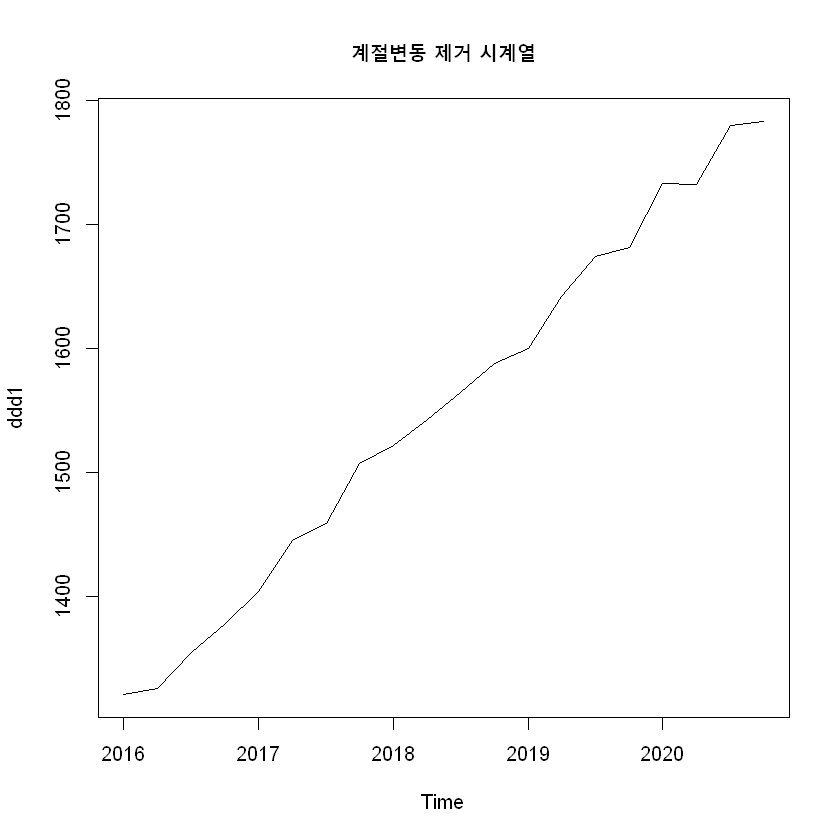

In [37]:
plot(ddd1, main="계절변동 제거 시계열")

# 반복되는 거 없어지고, 추세만 남음

In [38]:
# 추세trend 변동만 제거 

ddd2 <- dd4 - dd4_a$trend
ddd2

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,96.875,162.500
2017,-183.500,-75.625,87.500,176.625
2018,-177.750,-85.125,98.000,166.875
2019,-191.250,-79.625,106.125,152.125
2020,-164.375,-95.250,NA,NA


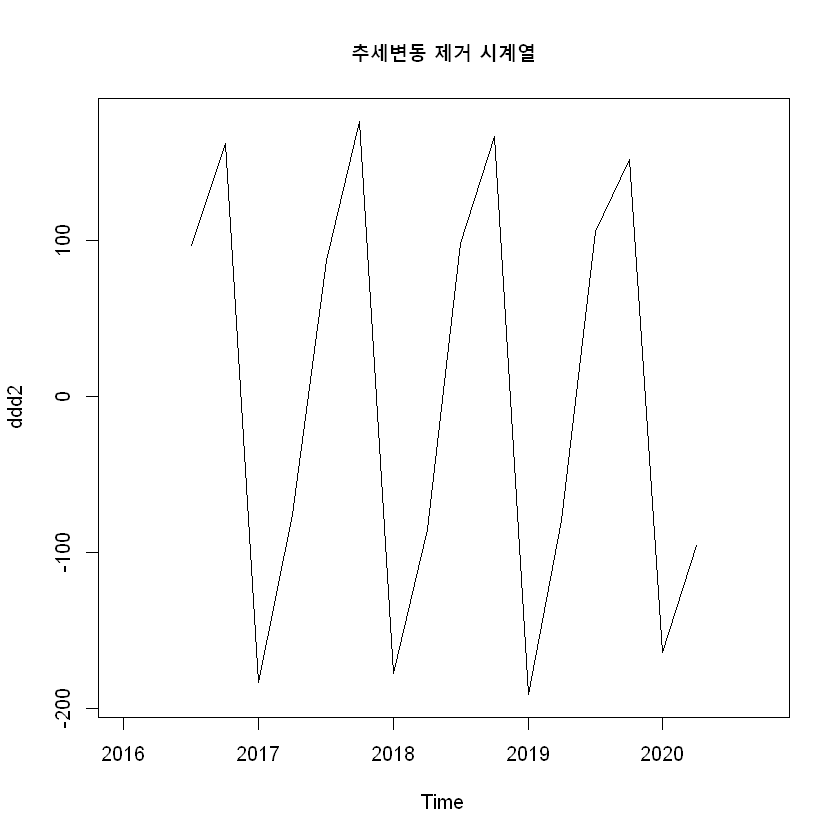

In [39]:
plot(ddd2, main="추세변동 제거 시계열")

# 계절성은 그대로 남아있지만, 추세는 제거함 

시계열 자료의 분해 : decompose 승법모형

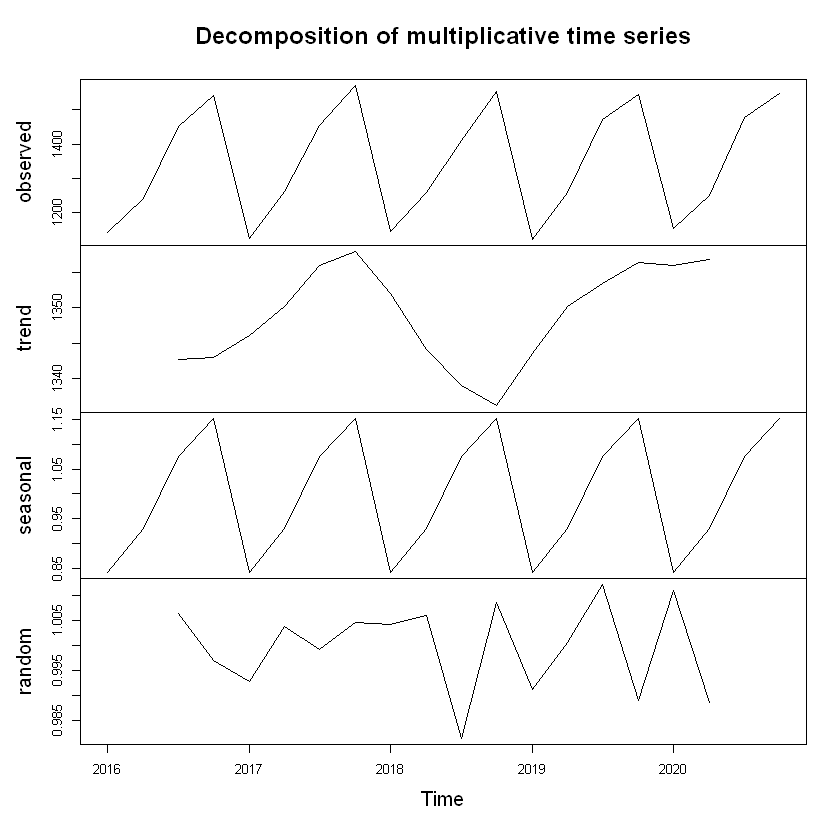

In [40]:
plot(decompose(dd2.ts, type="multiplicative"))

# air passenger 데이터를 가법/승법 모형으로 정상시계열 만들기

In [42]:
data(airpass)

In [43]:
airpass

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1960,112,118,132,129,121,135,148,148,136,119,104,118
1961,115,126,141,135,125,149,170,170,158,133,114,140
1962,145,150,178,163,172,178,199,199,184,162,146,166
1963,171,180,193,181,183,218,230,242,209,191,172,194
1964,196,196,236,235,229,243,264,272,237,211,180,201
1965,204,188,235,227,234,264,302,293,259,229,203,229
1966,242,233,267,269,270,315,364,347,312,274,237,278
1967,284,277,317,313,318,374,413,405,355,306,271,306
1968,315,301,356,348,355,422,465,467,404,347,305,336
1969,340,318,362,348,363,435,491,505,404,359,310,337


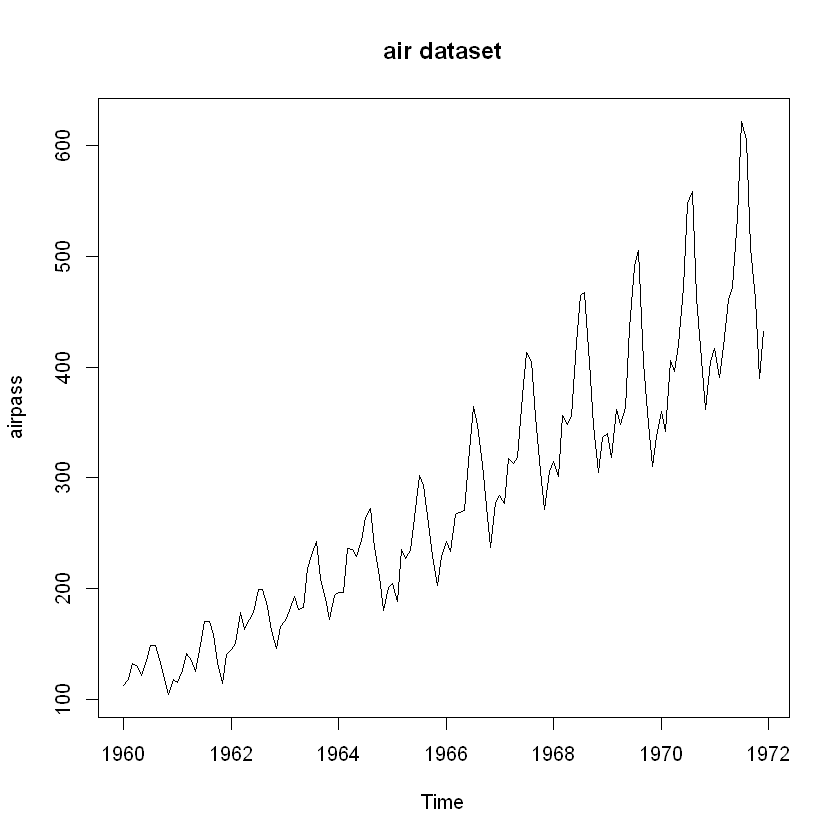

In [44]:
plot(airpass, main="air dataset")

차분 & 변환 둘다 필요한 데이터 

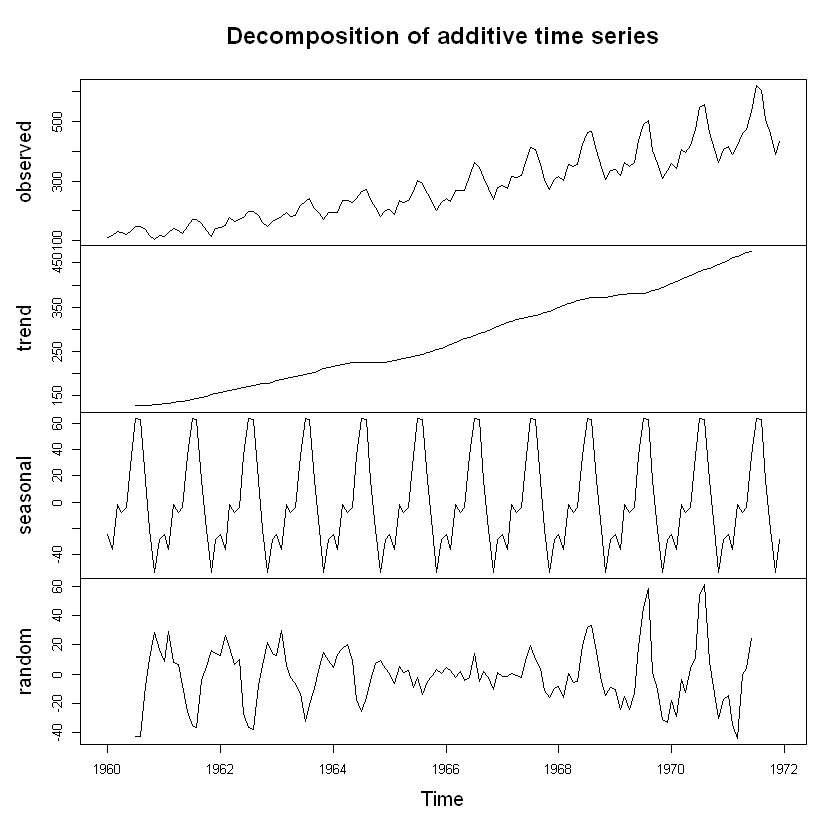

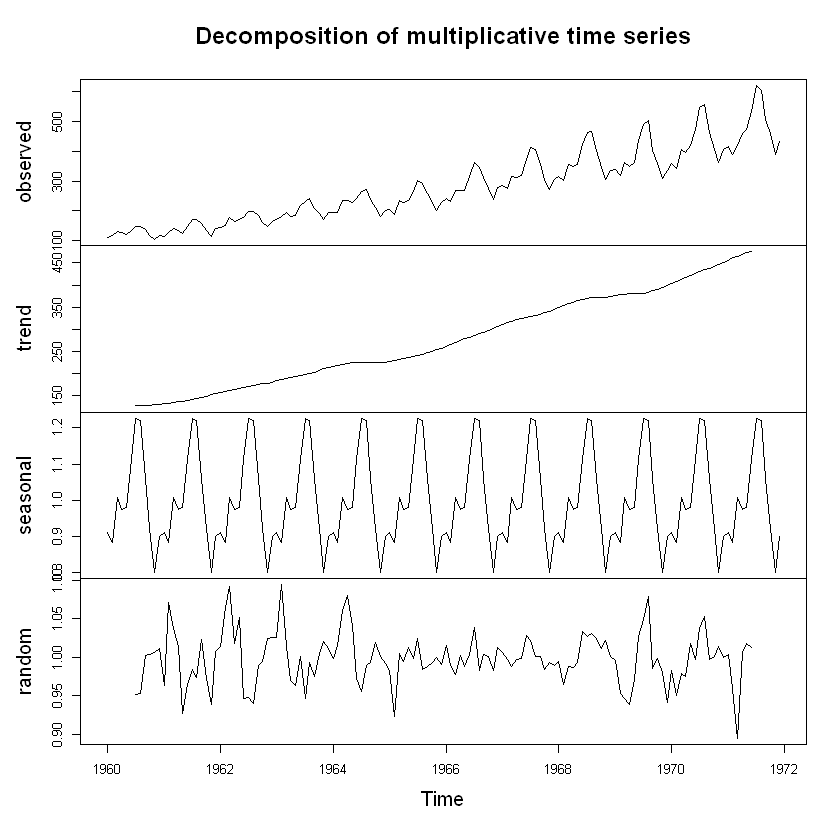

In [45]:
# 가법/승법 모형 분석 결과
plot(decompose(airpass, type='a'))
plot(decompose(airpass, type='m'))


# a : 가법 모형(additive model)
# m : 승법 모형(multiplicative model)

In [46]:
ddd = decompose(airpass, type='m')

# 승법모형

In [47]:
ddd

$x
     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960 112 118 132 129 121 135 148 148 136 119 104 118
1961 115 126 141 135 125 149 170 170 158 133 114 140
1962 145 150 178 163 172 178 199 199 184 162 146 166
1963 171 180 193 181 183 218 230 242 209 191 172 194
1964 196 196 236 235 229 243 264 272 237 211 180 201
1965 204 188 235 227 234 264 302 293 259 229 203 229
1966 242 233 267 269 270 315 364 347 312 274 237 278
1967 284 277 317 313 318 374 413 405 355 306 271 306
1968 315 301 356 348 355 422 465 467 404 347 305 336
1969 340 318 362 348 363 435 491 505 404 359 310 337
1970 360 342 406 396 420 472 548 559 463 407 362 405
1971 417 391 419 461 472 535 622 606 508 461 390 432

$seasonal
           Jan       Feb       Mar       Apr       May       Jun       Jul
1960 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1961 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1962 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.22655

### type='a' (가법 모형)

가법 모형은 시계열 데이터를 추세(trend), 계절성(seasonality), 잔차(residual)로 분해할 때 각 성분이 서로 더해진다고 가정하는 모형

* 시계열 값 = 추세 + 계절성 + 잔차
* 이 모형은 데이터의 변동폭(예: 계절성 변동)이 일정한 경우에 적합함. 즉, 데이터의 크기가 커져도 계절성이나 잔차의 크기가 크게 변하지 않는 경우

### type='m' (승법 모형)

승법 모형은 시계열 데이터를 추세, 계절성, 잔차로 분해할 때 각 성분이 곱해진다고 가정하는 모형

* 시계열 값 = 추세 × 계절성 × 잔차
* 이 모형은 데이터의 변동폭이 시간이 지남에 따라 변화하는 경우에 적합함. 즉, 데이터의 크기가 커짐에 따라 계절성 변동도 커지는 경우

<br><br>
### 요약:
* a: 가법 모형 (additive), 데이터의 변동폭이 일정할 때 사용.
* m: 승법 모형 (multiplicative), 데이터의 변동폭이 시간이 지남에 따라 달라질 때 사용.

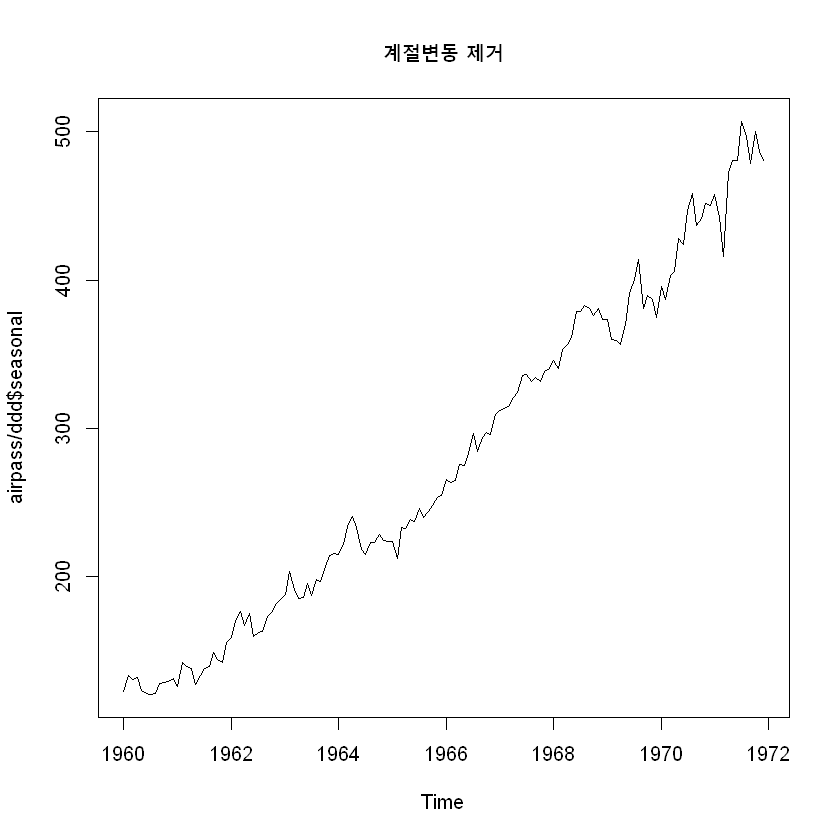

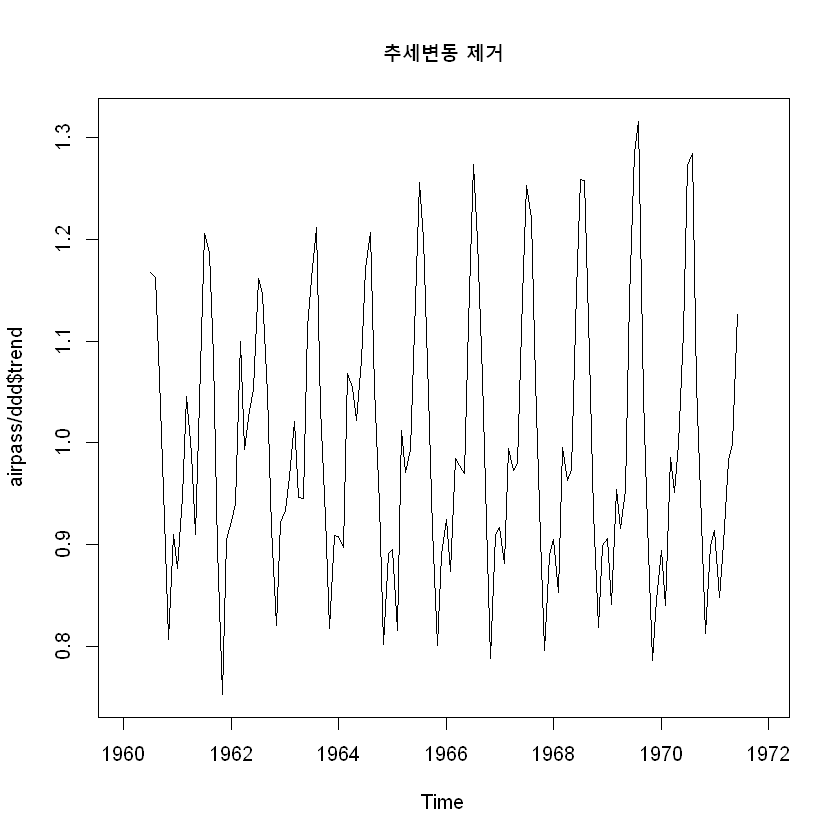

In [48]:
plot(airpass / ddd$seasonal, main="계절변동 제거")
plot(airpass / ddd$trend, main="추세변동 제거")